# Language Translation
In this project, you’re going to take a peek into the realm of neural network machine translation.  You’ll be training a sequence to sequence model on a dataset of English and French sentences that can translate new sentences from English to French.
## Get the Data
Since translating the whole language of English to French will take lots of time to train, we have provided you with a small portion of the English corpus.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import problem_unittests as tests

source_path = 'data/small_vocab_en'
target_path = 'data/small_vocab_fr'
source_text = helper.load_data(source_path)
target_text = helper.load_data(target_path)

## Explore the Data
Play around with view_sentence_range to view different parts of the data.

In [22]:
view_sentence_range = (0, 10)

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in source_text.split()})))

sentences = source_text.split('\n')
word_counts = [len(sentence.split()) for sentence in sentences]
print('Number of sentences: {}'.format(len(sentences)))
print('Average number of words in a sentence: {}'.format(np.average(word_counts)))

print()
print('English sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(source_text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))
print()
print('French sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(target_text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 227
Number of sentences: 137861
Average number of words in a sentence: 13.225277634719028

English sentences 0 to 10:
new jersey is sometimes quiet during autumn , and it is snowy in april .
the united states is usually chilly during july , and it is usually freezing in november .
california is usually quiet during march , and it is usually hot in june .
the united states is sometimes mild during june , and it is cold in september .
your least liked fruit is the grape , but my least liked is the apple .
his favorite fruit is the orange , but my favorite is the grape .
paris is relaxing during december , but it is usually chilly in july .
new jersey is busy during spring , and it is never hot in march .
our least liked fruit is the lemon , but my least liked is the grape .
the united states is sometimes busy during january , and it is sometimes warm in november .

French sentences 0 to 10:
new jersey est parfois calme pendant l' automne 

## Implement Preprocessing Function
### Text to Word Ids
As you did with other RNNs, you must turn the text into a number so the computer can understand it. In the function `text_to_ids()`, you'll turn `source_text` and `target_text` from words to ids.  However, you need to add the `<EOS>` word id at the end of each sentence from `target_text`.  This will help the neural network predict when the sentence should end.

You can get the `<EOS>` word id by doing:
```python
target_vocab_to_int['<EOS>']
```
You can get other word ids using `source_vocab_to_int` and `target_vocab_to_int`.

In [23]:
def text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int):
    """
    Convert source and target text to proper word ids
    :param source_text: String that contains all the source text.
    :param target_text: String that contains all the target text.
    :param source_vocab_to_int: Dictionary to go from the source words to an id
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :return: A tuple of lists (source_id_text, target_id_text)
    """
    # TODO: Implement Function
    source_id_text = []
    target_id_text = []
    #sen = []
    
    #for sentence in target_text.split('\n'):
     #   for word in sentence.split():
      #      sen.append(target_vocab_to_int[word])
       # sen.append(target_vocab_to_int['<EOS>'])
        #target_id_text.append(sen)
        #sen = []
    target_id_text = [[target_vocab_to_int[w] for w in s.split()] + [target_vocab_to_int['<EOS>']]
                  for s in target_text.split('\n')]

    #for sentence in source_text.split('\n'):
     #   for word in sentence.split():
      #      sen.append(source_vocab_to_int[word])
        #sen.append(source_vocab_to_int['<EOS>'])
       # source_id_text.append(sen)
        #sen = []
    source_id_text = [[source_vocab_to_int[w] for w in s.split()] for s in source_text.split('\n')]

    return source_id_text,target_id_text

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_text_to_ids(text_to_ids)

Tests Passed


### Preprocess all the data and save it
Running the code cell below will preprocess all the data and save it to file.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
helper.preprocess_and_save_data(source_path, target_path, text_to_ids)

# Check Point
This is your first checkpoint. If you ever decide to come back to this notebook or have to restart the notebook, you can start from here. The preprocessed data has been saved to disk.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np
import helper

(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = helper.load_preprocess()

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) in [LooseVersion('1.0.0'), LooseVersion('1.0.1')], 'This project requires TensorFlow version 1.0  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


## Build the Neural Network
You'll build the components necessary to build a Sequence-to-Sequence model by implementing the following functions below:
- `model_inputs`
- `process_decoding_input`
- `encoding_layer`
- `decoding_layer_train`
- `decoding_layer_infer`
- `decoding_layer`
- `seq2seq_model`

### Input
Implement the `model_inputs()` function to create TF Placeholders for the Neural Network. It should create the following placeholders:

- Input text placeholder named "input" using the TF Placeholder name parameter with rank 2.
- Targets placeholder with rank 2.
- Learning rate placeholder with rank 0.
- Keep probability placeholder named "keep_prob" using the TF Placeholder name parameter with rank 0.

Return the placeholders in the following the tuple (Input, Targets, Learing Rate, Keep Probability)

In [27]:
def model_inputs():
    """
    Create TF Placeholders for input, targets, and learning rate.
    :return: Tuple (input, targets, learning rate, keep probability)
    """
    # TODO: Implement Function
    input_ = tf.placeholder(tf.int32,[None,None],name = 'input')
    targets = tf.placeholder(tf.int32,[None,None])
    learning_rate = tf.placeholder(tf.float32)
    keep_prob = tf.placeholder(tf.float32,name ='keep_prob')
    return input_,targets,learning_rate,keep_prob

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Process Decoding Input
Implement `process_decoding_input` using TensorFlow to remove the last word id from each batch in `target_data` and concat the GO ID to the beginning of each batch.

In [28]:
def process_decoding_input(target_data, target_vocab_to_int, batch_size):
    """
    Preprocess target data for decoding
    :param target_data: Target Placeholder
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :param batch_size: Batch Size
    :return: Preprocessed target data
    """
    # TODO: Implement Function
    end = tf.strided_slice(target_data,[0,0],[batch_size,-1],[1,1])
    dec_input = tf.concat([tf.fill([batch_size,1],target_vocab_to_int['<GO>']),end],1)
    return dec_input

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_process_decoding_input(process_decoding_input)

Tests Passed


### Encoding
Implement `encoding_layer()` to create a Encoder RNN layer using [`tf.nn.dynamic_rnn()`](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn).

In [29]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob):
    """
    Create encoding layer
    :param rnn_inputs: Inputs for the RNN
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param keep_prob: Dropout keep probability
    :return: RNN state
    """
    # TODO: Implement Function
    cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(rnn_size)]*num_layers)
    cell = tf.contrib.rnn.DropoutWrapper(cell,output_keep_prob=keep_prob)
    _,state = tf.nn.dynamic_rnn(cell,inputs=rnn_inputs,dtype=tf.float32)
    return state

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_encoding_layer(encoding_layer)

Tests Passed


### Decoding - Training
Create training logits using [`tf.contrib.seq2seq.simple_decoder_fn_train()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/simple_decoder_fn_train) and [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder).  Apply the `output_fn` to the [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder) outputs.

In [30]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope,
                         output_fn, keep_prob):
    """
    Create a decoding layer for training
    :param encoder_state: Encoder State
    :param dec_cell: Decoder RNN Cell
    :param dec_embed_input: Decoder embedded input
    :param sequence_length: Sequence Length
    :param decoding_scope: TenorFlow Variable Scope for decoding
    :param output_fn: Function to apply the output layer
    :param keep_prob: Dropout keep probability
    :return: Train Logits
    """
    # TODO: Implement Function
    train_dec_func = tf.contrib.seq2seq.simple_decoder_fn_train(encoder_state=encoder_state)
    train_logits,_,_  = tf.contrib.seq2seq.dynamic_rnn_decoder(dec_cell,
                                                               train_dec_func,
                                                               dec_embed_input,sequence_length,
                                                               scope=decoding_scope) 
    return output_fn(train_logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer_train(decoding_layer_train)

Tests Passed


### Decoding - Inference
Create inference logits using [`tf.contrib.seq2seq.simple_decoder_fn_inference()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/simple_decoder_fn_inference) and [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder). 

In [31]:
def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id,
                         maximum_length, vocab_size, decoding_scope, output_fn, keep_prob):
    """
    Create a decoding layer for inference
    :param encoder_state: Encoder state
    :param dec_cell: Decoder RNN Cell
    :param dec_embeddings: Decoder embeddings
    :param start_of_sequence_id: GO ID
    :param end_of_sequence_id: EOS Id
    :param maximum_length: The maximum allowed time steps to decode
    :param vocab_size: Size of vocabulary
    :param decoding_scope: TensorFlow Variable Scope for decoding
    :param output_fn: Function to apply the output layer
    :param keep_prob: Dropout keep probability
    :return: Inference Logits
    """
    # TODO: Implement Function
    inf_dec_fun = tf.contrib.seq2seq.simple_decoder_fn_inference(output_fn,
                                                                 encoder_state,
                                                                 dec_embeddings,
                                                                 start_of_sequence_id,
                                                                 end_of_sequence_id,
                                                                 maximum_length,
                                                                 vocab_size)
    inference_logits,_,_ = tf.contrib.seq2seq.dynamic_rnn_decoder(dec_cell,inf_dec_fun,scope = decoding_scope)
    return inference_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer_infer(decoding_layer_infer)

Tests Passed


### Build the Decoding Layer
Implement `decoding_layer()` to create a Decoder RNN layer.

- Create RNN cell for decoding using `rnn_size` and `num_layers`.
- Create the output fuction using [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to transform it's input, logits, to class logits.
- Use the your `decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope, output_fn, keep_prob)` function to get the training logits.
- Use your `decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id, maximum_length, vocab_size, decoding_scope, output_fn, keep_prob)` function to get the inference logits.

Note: You'll need to use [tf.variable_scope](https://www.tensorflow.org/api_docs/python/tf/variable_scope) to share variables between training and inference.

In [32]:
def decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size,
                   num_layers, target_vocab_to_int, keep_prob):
    """
    Create decoding layer
    :param dec_embed_input: Decoder embedded input
    :param dec_embeddings: Decoder embeddings
    :param encoder_state: The encoded state
    :param vocab_size: Size of vocabulary
    :param sequence_length: Sequence Length
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :param keep_prob: Dropout keep probability
    :return: Tuple of (Training Logits, Inference Logits)
    """
    # TODO: Implement Function
    
    dec_cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(rnn_size)]*num_layers)
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell,output_keep_prob=keep_prob)
    with tf.variable_scope('decoding') as decoding_scope:
        output_fn = lambda x:tf.contrib.layers.fully_connected(x,vocab_size,None,scope = decoding_scope)
        train_logits = decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope,
                         output_fn, keep_prob)
        
    with tf.variable_scope("decoding", reuse=True) as decoding_scope:
        inf_logits = decoding_layer_infer(encoder_state, dec_cell, dec_embeddings,
                                          target_vocab_to_int['<GO>'],
                                          target_vocab_to_int['<EOS>'],
                         sequence_length, vocab_size, decoding_scope, output_fn, keep_prob)
        
        return train_logits,inf_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer(decoding_layer)

Tests Passed


### Build the Neural Network
Apply the functions you implemented above to:

- Apply embedding to the input data for the encoder.
- Encode the input using your `encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob)`.
- Process target data using your `process_decoding_input(target_data, target_vocab_to_int, batch_size)` function.
- Apply embedding to the target data for the decoder.
- Decode the encoded input using your `decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size, num_layers, target_vocab_to_int, keep_prob)`.

In [33]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size, sequence_length, source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size, rnn_size, num_layers, target_vocab_to_int):
    """
    Build the Sequence-to-Sequence part of the neural network
    :param input_data: Input placeholder
    :param target_data: Target placeholder
    :param keep_prob: Dropout keep probability placeholder
    :param batch_size: Batch Size
    :param sequence_length: Sequence Length
    :param source_vocab_size: Source vocabulary size
    :param target_vocab_size: Target vocabulary size
    :param enc_embedding_size: Decoder embedding size
    :param dec_embedding_size: Encoder embedding size
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :return: Tuple of (Training Logits, Inference Logits)
    """
    # TODO: Implement Function
    enc_input = tf.contrib.layers.embed_sequence(input_data,
                                                 source_vocab_size,
                                                 enc_embedding_size)
    enc_state = encoding_layer(enc_input,
                               rnn_size=rnn_size,
                               num_layers=num_layers,
                               keep_prob=keep_prob)
    dec_input = process_decoding_input(target_data,target_vocab_to_int,batch_size)
    
    dec_embedding = tf.Variable(tf.random_uniform([target_vocab_size,dec_embedding_size],-1,1))
    
    dec_embed_input = tf.nn.embedding_lookup(dec_embedding,dec_input)
    
    train_logits,inf_logits = decoding_layer(dec_embed_input,
                                             dec_embedding, 
                                             enc_state,
                                             target_vocab_size,
                                             sequence_length,
                                             rnn_size,
                                             num_layers,
                                             target_vocab_to_int,
                                             keep_prob)
    return train_logits,inf_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_seq2seq_model(seq2seq_model)

Tests Passed


## Neural Network Training
### Hyperparameters
Tune the following parameters:

- Set `epochs` to the number of epochs.
- Set `batch_size` to the batch size.
- Set `rnn_size` to the size of the RNNs.
- Set `num_layers` to the number of layers.
- Set `encoding_embedding_size` to the size of the embedding for the encoder.
- Set `decoding_embedding_size` to the size of the embedding for the decoder.
- Set `learning_rate` to the learning rate.
- Set `keep_probability` to the Dropout keep probability

In [34]:
# Number of Epochs
epochs = 15
# Batch Size
batch_size = 1024
# RNN Size
rnn_size = 512
# Number of Layers
num_layers = 4
# Embedding Size
encoding_embedding_size = 256
decoding_embedding_size = 256
# Learning Rate
learning_rate = 0.001
# Dropout Keep Probability
keep_probability = 0.88

### Build the Graph
Build the graph using the neural network you implemented.

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_path = 'checkpoints/dev'
(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = helper.load_preprocess()
max_source_sentence_length = max([len(sentence) for sentence in source_int_text])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, lr, keep_prob = model_inputs()
    sequence_length = tf.placeholder_with_default(max_source_sentence_length, None, name='sequence_length')
    input_shape = tf.shape(input_data)
    
    train_logits, inference_logits = seq2seq_model(
        tf.reverse(input_data, [-1]), targets, keep_prob, batch_size, sequence_length, len(source_vocab_to_int), len(target_vocab_to_int),
        encoding_embedding_size, decoding_embedding_size, rnn_size, num_layers, target_vocab_to_int)

    tf.identity(inference_logits, 'logits')
    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            train_logits,
            targets,
            tf.ones([input_shape[0], sequence_length]))

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

### Train
Train the neural network on the preprocessed data. If you have a hard time getting a good loss, check the forums to see if anyone is having the same problem.

Epoch   0 Batch    0/134 - Train Accuracy:  0.294, Validation Accuracy:  0.335, Loss:  5.882
Epoch   0 Batch    1/134 - Train Accuracy:  0.250, Validation Accuracy:  0.322, Loss:  5.742
Epoch   0 Batch    2/134 - Train Accuracy:  0.274, Validation Accuracy:  0.310, Loss:  4.451
Epoch   0 Batch    3/134 - Train Accuracy:  0.310, Validation Accuracy:  0.341, Loss:  5.632
Epoch   0 Batch    4/134 - Train Accuracy:  0.304, Validation Accuracy:  0.339, Loss:  4.067
Epoch   0 Batch    5/134 - Train Accuracy:  0.307, Validation Accuracy:  0.340, Loss:  4.403
Epoch   0 Batch    6/134 - Train Accuracy:  0.340, Validation Accuracy:  0.343, Loss:  3.957
Epoch   0 Batch    7/134 - Train Accuracy:  0.304, Validation Accuracy:  0.343, Loss:  3.706
Epoch   0 Batch    8/134 - Train Accuracy:  0.303, Validation Accuracy:  0.342, Loss:  3.538
Epoch   0 Batch    9/134 - Train Accuracy:  0.340, Validation Accuracy:  0.342, Loss:  3.321
Epoch   0 Batch   10/134 - Train Accuracy:  0.319, Validation Accuracy

Epoch   0 Batch   89/134 - Train Accuracy:  0.444, Validation Accuracy:  0.476, Loss:  1.703
Epoch   0 Batch   90/134 - Train Accuracy:  0.445, Validation Accuracy:  0.472, Loss:  1.688
Epoch   0 Batch   91/134 - Train Accuracy:  0.520, Validation Accuracy:  0.478, Loss:  1.453
Epoch   0 Batch   92/134 - Train Accuracy:  0.446, Validation Accuracy:  0.467, Loss:  1.652
Epoch   0 Batch   93/134 - Train Accuracy:  0.460, Validation Accuracy:  0.478, Loss:  1.613
Epoch   0 Batch   94/134 - Train Accuracy:  0.450, Validation Accuracy:  0.476, Loss:  1.612
Epoch   0 Batch   95/134 - Train Accuracy:  0.452, Validation Accuracy:  0.478, Loss:  1.612
Epoch   0 Batch   96/134 - Train Accuracy:  0.451, Validation Accuracy:  0.475, Loss:  1.595
Epoch   0 Batch   97/134 - Train Accuracy:  0.442, Validation Accuracy:  0.478, Loss:  1.581
Epoch   0 Batch   98/134 - Train Accuracy:  0.423, Validation Accuracy:  0.481, Loss:  1.648
Epoch   0 Batch   99/134 - Train Accuracy:  0.460, Validation Accuracy

Epoch   1 Batch   45/134 - Train Accuracy:  0.463, Validation Accuracy:  0.496, Loss:  0.999
Epoch   1 Batch   46/134 - Train Accuracy:  0.483, Validation Accuracy:  0.494, Loss:  0.967
Epoch   1 Batch   47/134 - Train Accuracy:  0.471, Validation Accuracy:  0.496, Loss:  0.998
Epoch   1 Batch   48/134 - Train Accuracy:  0.467, Validation Accuracy:  0.484, Loss:  0.988
Epoch   1 Batch   49/134 - Train Accuracy:  0.469, Validation Accuracy:  0.485, Loss:  0.992
Epoch   1 Batch   50/134 - Train Accuracy:  0.437, Validation Accuracy:  0.469, Loss:  0.986
Epoch   1 Batch   51/134 - Train Accuracy:  0.457, Validation Accuracy:  0.479, Loss:  0.988
Epoch   1 Batch   52/134 - Train Accuracy:  0.437, Validation Accuracy:  0.462, Loss:  0.989
Epoch   1 Batch   53/134 - Train Accuracy:  0.442, Validation Accuracy:  0.480, Loss:  0.969
Epoch   1 Batch   54/134 - Train Accuracy:  0.444, Validation Accuracy:  0.471, Loss:  0.976
Epoch   1 Batch   55/134 - Train Accuracy:  0.455, Validation Accuracy

Epoch   2 Batch    1/134 - Train Accuracy:  0.373, Validation Accuracy:  0.428, Loss:  2.741
Epoch   2 Batch    2/134 - Train Accuracy:  0.405, Validation Accuracy:  0.427, Loss:  1.326
Epoch   2 Batch    3/134 - Train Accuracy:  0.412, Validation Accuracy:  0.438, Loss:  1.429
Epoch   2 Batch    4/134 - Train Accuracy:  0.402, Validation Accuracy:  0.435, Loss:  1.144
Epoch   2 Batch    5/134 - Train Accuracy:  0.409, Validation Accuracy:  0.444, Loss:  1.313
Epoch   2 Batch    6/134 - Train Accuracy:  0.472, Validation Accuracy:  0.471, Loss:  1.071
Epoch   2 Batch    7/134 - Train Accuracy:  0.421, Validation Accuracy:  0.449, Loss:  1.062
Epoch   2 Batch    8/134 - Train Accuracy:  0.443, Validation Accuracy:  0.463, Loss:  1.090
Epoch   2 Batch    9/134 - Train Accuracy:  0.486, Validation Accuracy:  0.482, Loss:  1.048
Epoch   2 Batch   10/134 - Train Accuracy:  0.430, Validation Accuracy:  0.455, Loss:  1.058
Epoch   2 Batch   11/134 - Train Accuracy:  0.443, Validation Accuracy

Epoch   2 Batch   90/134 - Train Accuracy:  0.585, Validation Accuracy:  0.605, Loss:  0.670
Epoch   2 Batch   91/134 - Train Accuracy:  0.640, Validation Accuracy:  0.597, Loss:  0.577
Epoch   2 Batch   92/134 - Train Accuracy:  0.582, Validation Accuracy:  0.598, Loss:  0.659
Epoch   2 Batch   93/134 - Train Accuracy:  0.584, Validation Accuracy:  0.600, Loss:  0.653
Epoch   2 Batch   94/134 - Train Accuracy:  0.591, Validation Accuracy:  0.608, Loss:  0.644
Epoch   2 Batch   95/134 - Train Accuracy:  0.603, Validation Accuracy:  0.607, Loss:  0.651
Epoch   2 Batch   96/134 - Train Accuracy:  0.601, Validation Accuracy:  0.613, Loss:  0.657
Epoch   2 Batch   97/134 - Train Accuracy:  0.583, Validation Accuracy:  0.612, Loss:  0.655
Epoch   2 Batch   98/134 - Train Accuracy:  0.570, Validation Accuracy:  0.611, Loss:  0.691
Epoch   2 Batch   99/134 - Train Accuracy:  0.600, Validation Accuracy:  0.611, Loss:  0.650
Epoch   2 Batch  100/134 - Train Accuracy:  0.598, Validation Accuracy

Epoch   3 Batch   46/134 - Train Accuracy:  0.643, Validation Accuracy:  0.642, Loss:  0.540
Epoch   3 Batch   47/134 - Train Accuracy:  0.625, Validation Accuracy:  0.645, Loss:  0.562
Epoch   3 Batch   48/134 - Train Accuracy:  0.625, Validation Accuracy:  0.639, Loss:  0.552
Epoch   3 Batch   49/134 - Train Accuracy:  0.625, Validation Accuracy:  0.634, Loss:  0.553
Epoch   3 Batch   50/134 - Train Accuracy:  0.623, Validation Accuracy:  0.640, Loss:  0.560
Epoch   3 Batch   51/134 - Train Accuracy:  0.615, Validation Accuracy:  0.639, Loss:  0.553
Epoch   3 Batch   52/134 - Train Accuracy:  0.618, Validation Accuracy:  0.643, Loss:  0.556
Epoch   3 Batch   53/134 - Train Accuracy:  0.622, Validation Accuracy:  0.639, Loss:  0.555
Epoch   3 Batch   54/134 - Train Accuracy:  0.603, Validation Accuracy:  0.634, Loss:  0.555
Epoch   3 Batch   55/134 - Train Accuracy:  0.617, Validation Accuracy:  0.631, Loss:  0.556
Epoch   3 Batch   56/134 - Train Accuracy:  0.633, Validation Accuracy

Epoch   4 Batch    2/134 - Train Accuracy:  0.640, Validation Accuracy:  0.655, Loss:  0.496
Epoch   4 Batch    3/134 - Train Accuracy:  0.644, Validation Accuracy:  0.652, Loss:  0.495
Epoch   4 Batch    4/134 - Train Accuracy:  0.649, Validation Accuracy:  0.658, Loss:  0.505
Epoch   4 Batch    5/134 - Train Accuracy:  0.646, Validation Accuracy:  0.668, Loss:  0.510
Epoch   4 Batch    6/134 - Train Accuracy:  0.672, Validation Accuracy:  0.673, Loss:  0.472
Epoch   4 Batch    7/134 - Train Accuracy:  0.648, Validation Accuracy:  0.669, Loss:  0.493
Epoch   4 Batch    8/134 - Train Accuracy:  0.652, Validation Accuracy:  0.663, Loss:  0.493
Epoch   4 Batch    9/134 - Train Accuracy:  0.678, Validation Accuracy:  0.664, Loss:  0.465
Epoch   4 Batch   10/134 - Train Accuracy:  0.663, Validation Accuracy:  0.670, Loss:  0.487
Epoch   4 Batch   11/134 - Train Accuracy:  0.664, Validation Accuracy:  0.675, Loss:  0.490
Epoch   4 Batch   12/134 - Train Accuracy:  0.671, Validation Accuracy

Epoch   4 Batch   91/134 - Train Accuracy:  0.734, Validation Accuracy:  0.702, Loss:  0.373
Epoch   4 Batch   92/134 - Train Accuracy:  0.693, Validation Accuracy:  0.699, Loss:  0.420
Epoch   4 Batch   93/134 - Train Accuracy:  0.699, Validation Accuracy:  0.699, Loss:  0.417
Epoch   4 Batch   94/134 - Train Accuracy:  0.703, Validation Accuracy:  0.706, Loss:  0.412
Epoch   4 Batch   95/134 - Train Accuracy:  0.699, Validation Accuracy:  0.702, Loss:  0.417
Epoch   4 Batch   96/134 - Train Accuracy:  0.699, Validation Accuracy:  0.698, Loss:  0.418
Epoch   4 Batch   97/134 - Train Accuracy:  0.676, Validation Accuracy:  0.702, Loss:  0.419
Epoch   4 Batch   98/134 - Train Accuracy:  0.660, Validation Accuracy:  0.705, Loss:  0.443
Epoch   4 Batch   99/134 - Train Accuracy:  0.688, Validation Accuracy:  0.700, Loss:  0.417
Epoch   4 Batch  100/134 - Train Accuracy:  0.680, Validation Accuracy:  0.695, Loss:  0.418
Epoch   4 Batch  101/134 - Train Accuracy:  0.638, Validation Accuracy

Epoch   5 Batch   47/134 - Train Accuracy:  0.719, Validation Accuracy:  0.733, Loss:  0.354
Epoch   5 Batch   48/134 - Train Accuracy:  0.721, Validation Accuracy:  0.739, Loss:  0.346
Epoch   5 Batch   49/134 - Train Accuracy:  0.743, Validation Accuracy:  0.744, Loss:  0.345
Epoch   5 Batch   50/134 - Train Accuracy:  0.720, Validation Accuracy:  0.747, Loss:  0.349
Epoch   5 Batch   51/134 - Train Accuracy:  0.718, Validation Accuracy:  0.743, Loss:  0.344
Epoch   5 Batch   52/134 - Train Accuracy:  0.726, Validation Accuracy:  0.739, Loss:  0.345
Epoch   5 Batch   53/134 - Train Accuracy:  0.726, Validation Accuracy:  0.739, Loss:  0.348
Epoch   5 Batch   54/134 - Train Accuracy:  0.710, Validation Accuracy:  0.734, Loss:  0.341
Epoch   5 Batch   55/134 - Train Accuracy:  0.723, Validation Accuracy:  0.726, Loss:  0.345
Epoch   5 Batch   56/134 - Train Accuracy:  0.726, Validation Accuracy:  0.720, Loss:  0.327
Epoch   5 Batch   57/134 - Train Accuracy:  0.711, Validation Accuracy

Epoch   6 Batch    3/134 - Train Accuracy:  0.750, Validation Accuracy:  0.757, Loss:  0.283
Epoch   6 Batch    4/134 - Train Accuracy:  0.755, Validation Accuracy:  0.761, Loss:  0.289
Epoch   6 Batch    5/134 - Train Accuracy:  0.747, Validation Accuracy:  0.761, Loss:  0.295
Epoch   6 Batch    6/134 - Train Accuracy:  0.761, Validation Accuracy:  0.767, Loss:  0.269
Epoch   6 Batch    7/134 - Train Accuracy:  0.759, Validation Accuracy:  0.763, Loss:  0.282
Epoch   6 Batch    8/134 - Train Accuracy:  0.760, Validation Accuracy:  0.769, Loss:  0.278
Epoch   6 Batch    9/134 - Train Accuracy:  0.778, Validation Accuracy:  0.767, Loss:  0.266
Epoch   6 Batch   10/134 - Train Accuracy:  0.758, Validation Accuracy:  0.767, Loss:  0.279
Epoch   6 Batch   11/134 - Train Accuracy:  0.760, Validation Accuracy:  0.774, Loss:  0.279
Epoch   6 Batch   12/134 - Train Accuracy:  0.769, Validation Accuracy:  0.771, Loss:  0.267
Epoch   6 Batch   13/134 - Train Accuracy:  0.731, Validation Accuracy

Epoch   6 Batch   92/134 - Train Accuracy:  0.803, Validation Accuracy:  0.806, Loss:  0.223
Epoch   6 Batch   93/134 - Train Accuracy:  0.772, Validation Accuracy:  0.781, Loss:  0.230
Epoch   6 Batch   94/134 - Train Accuracy:  0.805, Validation Accuracy:  0.804, Loss:  0.228
Epoch   6 Batch   95/134 - Train Accuracy:  0.814, Validation Accuracy:  0.812, Loss:  0.228
Epoch   6 Batch   96/134 - Train Accuracy:  0.802, Validation Accuracy:  0.803, Loss:  0.225
Epoch   6 Batch   97/134 - Train Accuracy:  0.782, Validation Accuracy:  0.799, Loss:  0.236
Epoch   6 Batch   98/134 - Train Accuracy:  0.783, Validation Accuracy:  0.809, Loss:  0.248
Epoch   6 Batch   99/134 - Train Accuracy:  0.795, Validation Accuracy:  0.814, Loss:  0.235
Epoch   6 Batch  100/134 - Train Accuracy:  0.805, Validation Accuracy:  0.820, Loss:  0.229
Epoch   6 Batch  101/134 - Train Accuracy:  0.803, Validation Accuracy:  0.812, Loss:  0.239
Epoch   6 Batch  102/134 - Train Accuracy:  0.813, Validation Accuracy

Epoch   7 Batch   48/134 - Train Accuracy:  0.843, Validation Accuracy:  0.848, Loss:  0.173
Epoch   7 Batch   49/134 - Train Accuracy:  0.877, Validation Accuracy:  0.859, Loss:  0.175
Epoch   7 Batch   50/134 - Train Accuracy:  0.879, Validation Accuracy:  0.872, Loss:  0.171
Epoch   7 Batch   51/134 - Train Accuracy:  0.853, Validation Accuracy:  0.863, Loss:  0.166
Epoch   7 Batch   52/134 - Train Accuracy:  0.866, Validation Accuracy:  0.869, Loss:  0.174
Epoch   7 Batch   53/134 - Train Accuracy:  0.866, Validation Accuracy:  0.869, Loss:  0.165
Epoch   7 Batch   54/134 - Train Accuracy:  0.854, Validation Accuracy:  0.863, Loss:  0.166
Epoch   7 Batch   55/134 - Train Accuracy:  0.873, Validation Accuracy:  0.879, Loss:  0.170
Epoch   7 Batch   56/134 - Train Accuracy:  0.875, Validation Accuracy:  0.877, Loss:  0.157
Epoch   7 Batch   57/134 - Train Accuracy:  0.873, Validation Accuracy:  0.877, Loss:  0.166
Epoch   7 Batch   58/134 - Train Accuracy:  0.882, Validation Accuracy

Epoch   8 Batch    4/134 - Train Accuracy:  0.907, Validation Accuracy:  0.909, Loss:  0.111
Epoch   8 Batch    5/134 - Train Accuracy:  0.906, Validation Accuracy:  0.915, Loss:  0.121
Epoch   8 Batch    6/134 - Train Accuracy:  0.910, Validation Accuracy:  0.909, Loss:  0.104
Epoch   8 Batch    7/134 - Train Accuracy:  0.900, Validation Accuracy:  0.899, Loss:  0.113
Epoch   8 Batch    8/134 - Train Accuracy:  0.910, Validation Accuracy:  0.914, Loss:  0.108
Epoch   8 Batch    9/134 - Train Accuracy:  0.916, Validation Accuracy:  0.913, Loss:  0.099
Epoch   8 Batch   10/134 - Train Accuracy:  0.905, Validation Accuracy:  0.919, Loss:  0.111
Epoch   8 Batch   11/134 - Train Accuracy:  0.903, Validation Accuracy:  0.919, Loss:  0.105
Epoch   8 Batch   12/134 - Train Accuracy:  0.911, Validation Accuracy:  0.920, Loss:  0.104
Epoch   8 Batch   13/134 - Train Accuracy:  0.903, Validation Accuracy:  0.910, Loss:  0.106
Epoch   8 Batch   14/134 - Train Accuracy:  0.918, Validation Accuracy

Epoch   8 Batch   93/134 - Train Accuracy:  0.933, Validation Accuracy:  0.934, Loss:  0.064
Epoch   8 Batch   94/134 - Train Accuracy:  0.927, Validation Accuracy:  0.936, Loss:  0.064
Epoch   8 Batch   95/134 - Train Accuracy:  0.927, Validation Accuracy:  0.938, Loss:  0.064
Epoch   8 Batch   96/134 - Train Accuracy:  0.939, Validation Accuracy:  0.939, Loss:  0.065
Epoch   8 Batch   97/134 - Train Accuracy:  0.922, Validation Accuracy:  0.941, Loss:  0.064
Epoch   8 Batch   98/134 - Train Accuracy:  0.938, Validation Accuracy:  0.939, Loss:  0.068
Epoch   8 Batch   99/134 - Train Accuracy:  0.936, Validation Accuracy:  0.934, Loss:  0.063
Epoch   8 Batch  100/134 - Train Accuracy:  0.926, Validation Accuracy:  0.935, Loss:  0.065
Epoch   8 Batch  101/134 - Train Accuracy:  0.934, Validation Accuracy:  0.940, Loss:  0.069
Epoch   8 Batch  102/134 - Train Accuracy:  0.931, Validation Accuracy:  0.937, Loss:  0.063
Epoch   8 Batch  103/134 - Train Accuracy:  0.933, Validation Accuracy

Epoch   9 Batch   49/134 - Train Accuracy:  0.944, Validation Accuracy:  0.943, Loss:  0.049
Epoch   9 Batch   50/134 - Train Accuracy:  0.942, Validation Accuracy:  0.942, Loss:  0.051
Epoch   9 Batch   51/134 - Train Accuracy:  0.945, Validation Accuracy:  0.946, Loss:  0.051
Epoch   9 Batch   52/134 - Train Accuracy:  0.937, Validation Accuracy:  0.944, Loss:  0.050
Epoch   9 Batch   53/134 - Train Accuracy:  0.947, Validation Accuracy:  0.945, Loss:  0.048
Epoch   9 Batch   54/134 - Train Accuracy:  0.932, Validation Accuracy:  0.943, Loss:  0.048
Epoch   9 Batch   55/134 - Train Accuracy:  0.939, Validation Accuracy:  0.942, Loss:  0.052
Epoch   9 Batch   56/134 - Train Accuracy:  0.940, Validation Accuracy:  0.941, Loss:  0.049
Epoch   9 Batch   57/134 - Train Accuracy:  0.945, Validation Accuracy:  0.946, Loss:  0.049
Epoch   9 Batch   58/134 - Train Accuracy:  0.943, Validation Accuracy:  0.949, Loss:  0.045
Epoch   9 Batch   59/134 - Train Accuracy:  0.944, Validation Accuracy

Epoch  10 Batch    5/134 - Train Accuracy:  0.947, Validation Accuracy:  0.954, Loss:  0.044
Epoch  10 Batch    6/134 - Train Accuracy:  0.951, Validation Accuracy:  0.954, Loss:  0.035
Epoch  10 Batch    7/134 - Train Accuracy:  0.951, Validation Accuracy:  0.954, Loss:  0.039
Epoch  10 Batch    8/134 - Train Accuracy:  0.948, Validation Accuracy:  0.950, Loss:  0.036
Epoch  10 Batch    9/134 - Train Accuracy:  0.956, Validation Accuracy:  0.952, Loss:  0.033
Epoch  10 Batch   10/134 - Train Accuracy:  0.949, Validation Accuracy:  0.954, Loss:  0.040
Epoch  10 Batch   11/134 - Train Accuracy:  0.950, Validation Accuracy:  0.954, Loss:  0.040
Epoch  10 Batch   12/134 - Train Accuracy:  0.949, Validation Accuracy:  0.958, Loss:  0.038
Epoch  10 Batch   13/134 - Train Accuracy:  0.945, Validation Accuracy:  0.958, Loss:  0.039
Epoch  10 Batch   14/134 - Train Accuracy:  0.950, Validation Accuracy:  0.958, Loss:  0.039
Epoch  10 Batch   15/134 - Train Accuracy:  0.951, Validation Accuracy

Epoch  10 Batch   94/134 - Train Accuracy:  0.912, Validation Accuracy:  0.919, Loss:  0.076
Epoch  10 Batch   95/134 - Train Accuracy:  0.931, Validation Accuracy:  0.928, Loss:  0.079
Epoch  10 Batch   96/134 - Train Accuracy:  0.922, Validation Accuracy:  0.929, Loss:  0.069
Epoch  10 Batch   97/134 - Train Accuracy:  0.920, Validation Accuracy:  0.931, Loss:  0.067
Epoch  10 Batch   98/134 - Train Accuracy:  0.930, Validation Accuracy:  0.936, Loss:  0.070
Epoch  10 Batch   99/134 - Train Accuracy:  0.928, Validation Accuracy:  0.935, Loss:  0.064
Epoch  10 Batch  100/134 - Train Accuracy:  0.926, Validation Accuracy:  0.932, Loss:  0.064
Epoch  10 Batch  101/134 - Train Accuracy:  0.942, Validation Accuracy:  0.934, Loss:  0.065
Epoch  10 Batch  102/134 - Train Accuracy:  0.931, Validation Accuracy:  0.934, Loss:  0.057
Epoch  10 Batch  103/134 - Train Accuracy:  0.936, Validation Accuracy:  0.936, Loss:  0.057
Epoch  10 Batch  104/134 - Train Accuracy:  0.937, Validation Accuracy

Epoch  11 Batch   50/134 - Train Accuracy:  0.963, Validation Accuracy:  0.961, Loss:  0.033
Epoch  11 Batch   51/134 - Train Accuracy:  0.959, Validation Accuracy:  0.962, Loss:  0.034
Epoch  11 Batch   52/134 - Train Accuracy:  0.961, Validation Accuracy:  0.959, Loss:  0.030
Epoch  11 Batch   53/134 - Train Accuracy:  0.964, Validation Accuracy:  0.964, Loss:  0.030
Epoch  11 Batch   54/134 - Train Accuracy:  0.955, Validation Accuracy:  0.962, Loss:  0.031
Epoch  11 Batch   55/134 - Train Accuracy:  0.959, Validation Accuracy:  0.960, Loss:  0.034
Epoch  11 Batch   56/134 - Train Accuracy:  0.951, Validation Accuracy:  0.959, Loss:  0.032
Epoch  11 Batch   57/134 - Train Accuracy:  0.965, Validation Accuracy:  0.960, Loss:  0.031
Epoch  11 Batch   58/134 - Train Accuracy:  0.964, Validation Accuracy:  0.962, Loss:  0.028
Epoch  11 Batch   59/134 - Train Accuracy:  0.960, Validation Accuracy:  0.960, Loss:  0.031
Epoch  11 Batch   60/134 - Train Accuracy:  0.959, Validation Accuracy

Epoch  12 Batch    6/134 - Train Accuracy:  0.966, Validation Accuracy:  0.965, Loss:  0.023
Epoch  12 Batch    7/134 - Train Accuracy:  0.968, Validation Accuracy:  0.967, Loss:  0.025
Epoch  12 Batch    8/134 - Train Accuracy:  0.967, Validation Accuracy:  0.968, Loss:  0.024
Epoch  12 Batch    9/134 - Train Accuracy:  0.974, Validation Accuracy:  0.968, Loss:  0.022
Epoch  12 Batch   10/134 - Train Accuracy:  0.961, Validation Accuracy:  0.967, Loss:  0.026
Epoch  12 Batch   11/134 - Train Accuracy:  0.966, Validation Accuracy:  0.968, Loss:  0.026
Epoch  12 Batch   12/134 - Train Accuracy:  0.957, Validation Accuracy:  0.971, Loss:  0.025
Epoch  12 Batch   13/134 - Train Accuracy:  0.962, Validation Accuracy:  0.970, Loss:  0.025
Epoch  12 Batch   14/134 - Train Accuracy:  0.964, Validation Accuracy:  0.972, Loss:  0.026
Epoch  12 Batch   15/134 - Train Accuracy:  0.968, Validation Accuracy:  0.968, Loss:  0.024
Epoch  12 Batch   16/134 - Train Accuracy:  0.967, Validation Accuracy

Epoch  12 Batch   95/134 - Train Accuracy:  0.972, Validation Accuracy:  0.972, Loss:  0.022
Epoch  12 Batch   96/134 - Train Accuracy:  0.967, Validation Accuracy:  0.971, Loss:  0.021
Epoch  12 Batch   97/134 - Train Accuracy:  0.969, Validation Accuracy:  0.969, Loss:  0.021
Epoch  12 Batch   98/134 - Train Accuracy:  0.967, Validation Accuracy:  0.969, Loss:  0.022
Epoch  12 Batch   99/134 - Train Accuracy:  0.971, Validation Accuracy:  0.970, Loss:  0.022
Epoch  12 Batch  100/134 - Train Accuracy:  0.972, Validation Accuracy:  0.968, Loss:  0.023
Epoch  12 Batch  101/134 - Train Accuracy:  0.966, Validation Accuracy:  0.970, Loss:  0.024
Epoch  12 Batch  102/134 - Train Accuracy:  0.968, Validation Accuracy:  0.972, Loss:  0.021
Epoch  12 Batch  103/134 - Train Accuracy:  0.966, Validation Accuracy:  0.971, Loss:  0.022
Epoch  12 Batch  104/134 - Train Accuracy:  0.971, Validation Accuracy:  0.968, Loss:  0.022
Epoch  12 Batch  105/134 - Train Accuracy:  0.967, Validation Accuracy

Epoch  13 Batch   51/134 - Train Accuracy:  0.972, Validation Accuracy:  0.972, Loss:  0.022
Epoch  13 Batch   52/134 - Train Accuracy:  0.973, Validation Accuracy:  0.973, Loss:  0.020
Epoch  13 Batch   53/134 - Train Accuracy:  0.974, Validation Accuracy:  0.972, Loss:  0.020
Epoch  13 Batch   54/134 - Train Accuracy:  0.964, Validation Accuracy:  0.968, Loss:  0.020
Epoch  13 Batch   55/134 - Train Accuracy:  0.975, Validation Accuracy:  0.969, Loss:  0.022
Epoch  13 Batch   56/134 - Train Accuracy:  0.970, Validation Accuracy:  0.971, Loss:  0.021
Epoch  13 Batch   57/134 - Train Accuracy:  0.974, Validation Accuracy:  0.971, Loss:  0.020
Epoch  13 Batch   58/134 - Train Accuracy:  0.977, Validation Accuracy:  0.972, Loss:  0.018
Epoch  13 Batch   59/134 - Train Accuracy:  0.971, Validation Accuracy:  0.973, Loss:  0.021
Epoch  13 Batch   60/134 - Train Accuracy:  0.970, Validation Accuracy:  0.972, Loss:  0.019
Epoch  13 Batch   61/134 - Train Accuracy:  0.966, Validation Accuracy

Epoch  14 Batch    7/134 - Train Accuracy:  0.975, Validation Accuracy:  0.970, Loss:  0.019
Epoch  14 Batch    8/134 - Train Accuracy:  0.970, Validation Accuracy:  0.972, Loss:  0.017
Epoch  14 Batch    9/134 - Train Accuracy:  0.980, Validation Accuracy:  0.974, Loss:  0.015
Epoch  14 Batch   10/134 - Train Accuracy:  0.974, Validation Accuracy:  0.973, Loss:  0.018
Epoch  14 Batch   11/134 - Train Accuracy:  0.973, Validation Accuracy:  0.971, Loss:  0.018
Epoch  14 Batch   12/134 - Train Accuracy:  0.977, Validation Accuracy:  0.973, Loss:  0.018
Epoch  14 Batch   13/134 - Train Accuracy:  0.969, Validation Accuracy:  0.976, Loss:  0.018
Epoch  14 Batch   14/134 - Train Accuracy:  0.974, Validation Accuracy:  0.979, Loss:  0.019
Epoch  14 Batch   15/134 - Train Accuracy:  0.976, Validation Accuracy:  0.975, Loss:  0.018
Epoch  14 Batch   16/134 - Train Accuracy:  0.977, Validation Accuracy:  0.974, Loss:  0.015
Epoch  14 Batch   17/134 - Train Accuracy:  0.976, Validation Accuracy

Epoch  14 Batch   96/134 - Train Accuracy:  0.975, Validation Accuracy:  0.968, Loss:  0.014
Epoch  14 Batch   97/134 - Train Accuracy:  0.977, Validation Accuracy:  0.969, Loss:  0.015
Epoch  14 Batch   98/134 - Train Accuracy:  0.977, Validation Accuracy:  0.974, Loss:  0.015
Epoch  14 Batch   99/134 - Train Accuracy:  0.980, Validation Accuracy:  0.972, Loss:  0.016
Epoch  14 Batch  100/134 - Train Accuracy:  0.979, Validation Accuracy:  0.971, Loss:  0.016
Epoch  14 Batch  101/134 - Train Accuracy:  0.976, Validation Accuracy:  0.971, Loss:  0.016
Epoch  14 Batch  102/134 - Train Accuracy:  0.978, Validation Accuracy:  0.970, Loss:  0.015
Epoch  14 Batch  103/134 - Train Accuracy:  0.975, Validation Accuracy:  0.971, Loss:  0.016
Epoch  14 Batch  104/134 - Train Accuracy:  0.980, Validation Accuracy:  0.970, Loss:  0.015
Epoch  14 Batch  105/134 - Train Accuracy:  0.978, Validation Accuracy:  0.971, Loss:  0.019
Epoch  14 Batch  106/134 - Train Accuracy:  0.979, Validation Accuracy

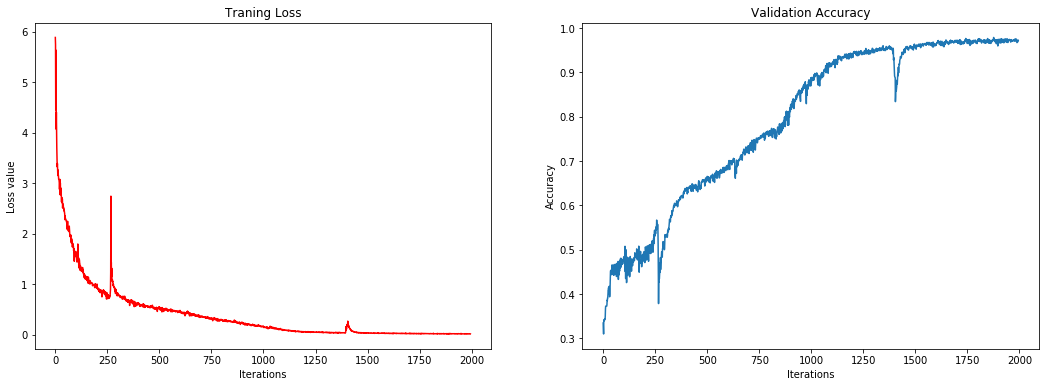

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import time

def get_accuracy(target, logits):
    """
    Calculate accuracy
    """
    max_seq = max(target.shape[1], logits.shape[1])
    if max_seq - target.shape[1]:
        target = np.pad(
            target,
            [(0,0),(0,max_seq - target.shape[1])],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1]), (0,0)],
            'constant')

    return np.mean(np.equal(target, np.argmax(logits, 2)))

train_source = source_int_text[batch_size:]
train_target = target_int_text[batch_size:]

valid_source = helper.pad_sentence_batch(source_int_text[:batch_size])
valid_target = helper.pad_sentence_batch(target_int_text[:batch_size])

loss_list = []
valid_acc_list = []
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(epochs):
        for batch_i, (source_batch, target_batch) in enumerate(
                helper.batch_data(train_source, train_target, batch_size)):
            start_time = time.time()
            
            _, loss = sess.run(
                [train_op, cost],
                {input_data: source_batch,
                 targets: target_batch,
                 lr: learning_rate,
                 sequence_length: target_batch.shape[1],
                 keep_prob: keep_probability})
            
            batch_train_logits = sess.run(
                inference_logits,
                {input_data: source_batch, keep_prob: 1.0})
            batch_valid_logits = sess.run(
                inference_logits,
                {input_data: valid_source, keep_prob: 1.0})
                
            train_acc = get_accuracy(target_batch, batch_train_logits)
            valid_acc = get_accuracy(np.array(valid_target), batch_valid_logits)
            end_time = time.time()
            print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.3f}, Validation Accuracy: {:>6.3f}, Loss: {:>6.3f}'
                  .format(epoch_i, batch_i, len(source_int_text) // batch_size, train_acc, valid_acc, loss))
            loss_list.append(loss)
            valid_acc_list.append(valid_acc)

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')
ax1.plot(loss_list, color='red')
ax1.set_title('Traning Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss value')
ax2.plot(valid_acc_list)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy')
plt.show()


### Save Parameters
Save the `batch_size` and `save_path` parameters for inference.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Save parameters for checkpoint
helper.save_params(save_path)

# Checkpoint

In [42]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import tensorflow as tf
import numpy as np
import helper
import problem_unittests as tests

_, (source_vocab_to_int, target_vocab_to_int), (source_int_to_vocab, target_int_to_vocab) = helper.load_preprocess()
load_path = helper.load_params()

## Sentence to Sequence
To feed a sentence into the model for translation, you first need to preprocess it.  Implement the function `sentence_to_seq()` to preprocess new sentences.

- Convert the sentence to lowercase
- Convert words into ids using `vocab_to_int`
- Convert words not in the vocabulary, to the `<UNK>` word id.

In [43]:
def sentence_to_seq(sentence, vocab_to_int):
    """
    Convert a sentence to a sequence of ids
    :param sentence: String
    :param vocab_to_int: Dictionary to go from the words to an id
    :return: List of word ids
    """
    # TODO: Implement Function
    sentencev = sentence.lower()
    words = sentence.split()
    words_int = [vocab_to_int.get(word,vocab_to_int['<UNK>']) for word in words]
    return words_int


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_sentence_to_seq(sentence_to_seq)

Tests Passed


## Translate
This will translate `translate_sentence` from English to French.

In [44]:
translate_sentence = 'he saw a old yellow truck .'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
translate_sentence = sentence_to_seq(translate_sentence, source_vocab_to_int)

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(load_path + '.meta')
    loader.restore(sess, load_path)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('logits:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

    translate_logits = sess.run(logits, {input_data: [translate_sentence], keep_prob: 1.0})[0]

print('Input')
print('  Word Ids:      {}'.format([i for i in translate_sentence]))
print('  English Words: {}'.format([source_int_to_vocab[i] for i in translate_sentence]))

print('\nPrediction')
print('  Word Ids:      {}'.format([i for i in np.argmax(translate_logits, 1)]))
print('  French Words: {}'.format([target_int_to_vocab[i] for i in np.argmax(translate_logits, 1)]))

Input
  Word Ids:      [100, 212, 6, 181, 175, 164, 174]
  English Words: ['he', 'saw', 'a', 'old', 'yellow', 'truck', '.']

Prediction
  Word Ids:      [302, 273, 13, 313, 99, 33, 161, 1]
  French Words: ['il', 'a', 'vu', 'gros', 'camion', 'rouge', '.', '<EOS>']


## Imperfect Translation
You might notice that some sentences translate better than others.  Since the dataset you're using only has a vocabulary of 227 English words of the thousands that you use, you're only going to see good results using these words.  Additionally, the translations in this data set were made by Google translate, so the translations themselves aren't particularly good.  (We apologize to the French speakers out there!) Thankfully, for this project, you don't need a perfect translation. However, if you want to create a better translation model, you'll need better data.

You can train on the [WMT10 French-English corpus](http://www.statmt.org/wmt10/training-giga-fren.tar).  This dataset has more vocabulary and richer in topics discussed.  However, this will take you days to train, so make sure you've a GPU and the neural network is performing well on dataset we provided.  Just make sure you play with the WMT10 corpus after you've submitted this project.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_language_translation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.